### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [34]:
# Import and read the charity_data.csv.
application_df = pd.read_csv("./Resources/charity_data.csv")
display(application_df.shape, application_df.head())

(34299, 12)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [35]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [36]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [37]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df.APPLICATION_TYPE.value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot: title={'center': 'Knee Point of APPLICATION_TYPE Counts'}, xlabel='APPLICATION_TYPE'>

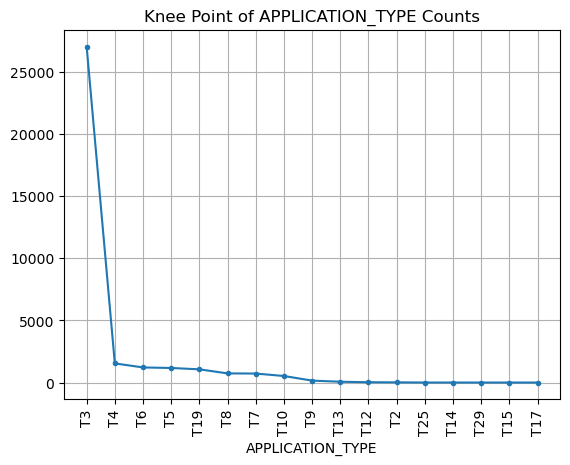

In [38]:
# Visualize the value counts of APPLICATION_TYPE
app_counts.plot.line(xlabel='APPLICATION_TYPE', title='Knee Point of APPLICATION_TYPE Counts', \
  xticks=range(0, len(app_counts)), rot=90, marker='.', grid=True)

In [39]:
# Determine which values to replace if counts are less than 528
replace_application = app_counts[app_counts < 528].index

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app, "Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [40]:
# Look at CLASSIFICATION value counts for binning
clf_counts = application_df.CLASSIFICATION.value_counts()
clf_counts[0:10]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: CLASSIFICATION, dtype: int64

<AxesSubplot: title={'center': 'Density Plot of CLASSIFICATION Counts'}, ylabel='Density'>

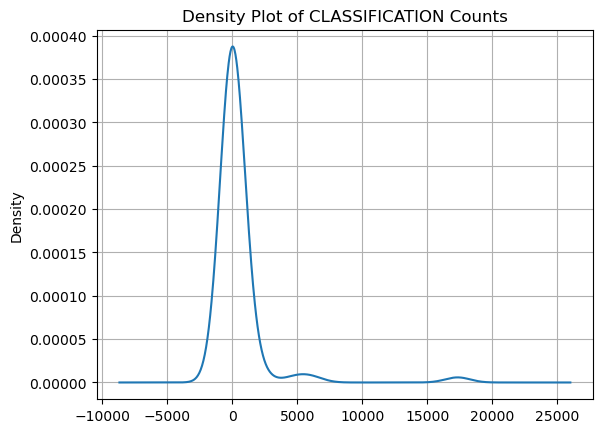

In [41]:
# Visualize the value counts of CLASSIFICATION
clf_counts.plot.density(title='Density Plot of CLASSIFICATION Counts', grid=True)

In [42]:
# Determine which values to replace if counts are less than 1000
replace_class = clf_counts[clf_counts < 1000].index

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls, "Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [43]:
# Generate our categorical variable lists
# list() is optional because all categorical elements are homogeneous and of the same data type (object).
application_cat = list(application_df.select_dtypes(include=['object']).columns)
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [44]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis=1)
display(application_df.shape, application_df.head())

(34299, 44)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
# Verify distribution of int columns
int_cols = list(application_df.select_dtypes(include=['int']).columns)
application_df[int_cols].describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,3.429900e+04,34299.000000
mean,0.999854,2.769199e+06,0.532406
std,0.012073,8.713045e+07,0.498956
min,0.000000,5.000000e+03,0.000000
25%,1.000000,5.000000e+03,0.000000
50%,1.000000,5.000000e+03,1.000000
75%,1.000000,7.742000e+03,1.000000
max,1.000000,8.597806e+09,1.000000


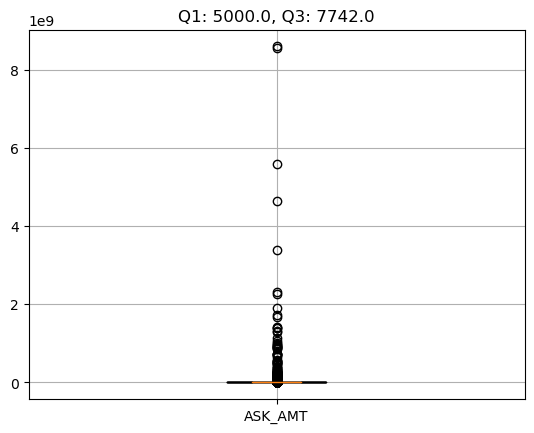

In [47]:
# Create a box-and-whisker plot for int columns
plt_data = application_df[int_cols[1]]
fig, ax = plt.subplots()
boxplt = ax.boxplot(plt_data, labels=[int_cols[1]], showcaps=True, notch=True, widths=0.2)
# print the 1st and 3rd quartile
iqrs = [item.get_ydata() for item in boxplt['whiskers']]
ax.set_title(f'Q1: {iqrs[:2][0][0]}, Q3: {iqrs[:2][1][0]}')
ax.grid()
# Save the figure.
plt.savefig('./Data/ASK_AMT_showfliers_boxplot.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()

In [48]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [49]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

- **NN Model 1** used activation functions called 'relu' for both hidden layers and 'sigmoid' for the output layer.
- **NN Model 2** used activation functions called 'tanh' for both hidden layers and 'sigmoid' for the output layer.

In [50]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
n_input_features = len(X_train_scaled[0])
n_hidden_layer1 = 8
n_hidden_layer2 = 3
# Define the model epoch and callback's saving period
epochn = 200
periodn = 5

# Reusable func to easily eval nn model (nodes*: number of nodes in each hidden layer, actf*: activation function)
def eval_nn(n1=n_hidden_layer1, n2=n_hidden_layer2, actf1='relu', actf2='relu'):
    # define nn model
    nn = tf.keras.models.Sequential()

    # First hidden layer
    nn.add(
        tf.keras.layers.Dense(units=n1, input_dim=n_input_features, activation=actf1)
    )

    # Second hidden layer
    nn.add(tf.keras.layers.Dense(units=n2, activation=actf2))

    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Check the structure of the model
    print(n_input_features, n1, n2)
    nn_sum = nn.summary()
    return (nn, nn_sum, n1, n2, actf1, actf2)

In [51]:
# Eval nn model using default nodes of 8/3 in hidden layer1/2, default activation function relu+relu+sigmoid
nn, nn_sum, n1, n2, actf1, actf2 = eval_nn()

43 8 3
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 352       
                                                                 
 dense_7 (Dense)             (None, 3)                 27        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 383
Trainable params: 383
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Define the checkpoint path and filenames
checkpoint_path = "checkpoints_" + actf1
os.makedirs(checkpoint_path, exist_ok=True)
checkpoint_files = checkpoint_path + "/weights_{epoch:03d}.hdf5"

In [53]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(filepath=checkpoint_files, verbose=1, save_weights_only=True, save_freq='epoch', period=periodn)
# Latest tensorflow version requires `save_freq` instead of `period`
# cp_callback = ModelCheckpoint(filepath=checkpoint_files, verbose=1, save_weights_only=True, save_freq=5)

In [54]:
# Train the model (with ModelCheckpoint)
fit_model = nn.fit(X_train_scaled, y_train, epochs=epochn, callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.6254 - accuracy: 0.6621
Epoch 2/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5717 - accuracy: 0.7215
Epoch 3/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5649 - accuracy: 0.7234
Epoch 4/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5616 - accuracy: 0.7245
Epoch 5/200
783/804 [============================>.] - ETA: 0s - loss: 0.5592 - accuracy: 0.7265
Epoch 5: saving model to checkpoints_relu\weights_005.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5594 - accuracy: 0.7264
Epoch 6/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5580 - accuracy: 0.7266
Epoch 7/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5567 - accuracy: 0.7282
Epoch 8/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5557 - accuracy: 0.7297
Epoch 9/200
804/804 [===========================

In [55]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5573 - accuracy: 0.7255 - 475ms/epoch - 2ms/step
Loss: 0.5573272705078125, Accuracy: 0.7254810333251953


In [56]:
# Export our model to HDF5 file
nn.save(checkpoint_path + "/AlphabetSoupCharity.h5")

In [57]:
# Create a DataFrame containing training history
history1_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))
legend1 = f'{actf1}{n1}_{actf2}{n2}_sigmoid'

In [58]:
# Eval nn model using default nodes of 8/3 in hidden layer1/2, default activation function relu+relu+sigmoid
nn, nn_sum, n1, n2, actf1, actf2 = eval_nn(n_hidden_layer1, n_hidden_layer2, 'tanh', 'tanh')

43 8 3
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 352       
                                                                 
 dense_10 (Dense)            (None, 3)                 27        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 383
Trainable params: 383
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Define the checkpoint path and filenames
checkpoint_path = "checkpoints_" + actf1
os.makedirs(checkpoint_path, exist_ok=True)
checkpoint_files = checkpoint_path + "/weights_{epoch:03d}.hdf5"

In [60]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(filepath=checkpoint_files, verbose=1, save_weights_only=True, save_freq='epoch', period=periodn)
# Latest tensorflow version requires `save_freq` instead of `period`
# cp_callback = ModelCheckpoint(filepath=checkpoint_files, verbose=1, save_weights_only=True, save_freq=5)

In [61]:
# Train the model (with ModelCheckpoint)
fit_model = nn.fit(X_train_scaled, y_train, epochs=epochn, callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.6046 - accuracy: 0.6938
Epoch 2/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5659 - accuracy: 0.7281
Epoch 3/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5605 - accuracy: 0.7308
Epoch 4/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5582 - accuracy: 0.7309
Epoch 5/200
803/804 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7309
Epoch 5: saving model to checkpoints_tanh\weights_005.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5565 - accuracy: 0.7309
Epoch 6/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5555 - accuracy: 0.7328
Epoch 7/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5547 - accuracy: 0.7322
Epoch 8/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5541 - accuracy: 0.7323
Epoch 9/200
804/804 [===========================

In [62]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5550 - accuracy: 0.7241 - 457ms/epoch - 2ms/step
Loss: 0.5550094246864319, Accuracy: 0.7240816354751587


In [63]:
# Export our model to HDF5 file
nn.save(checkpoint_path + "/AlphabetSoupCharity.h5")

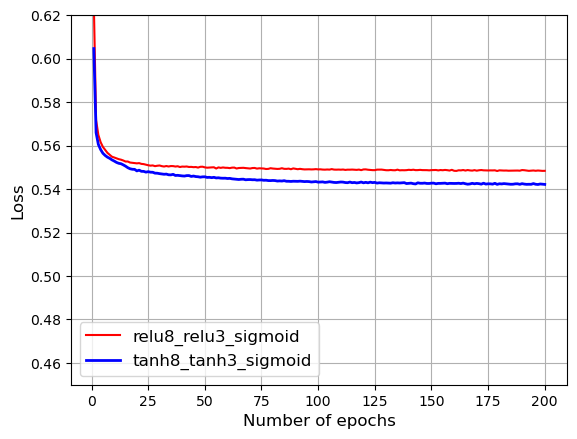

In [64]:
# Create a DataFrame containing training history
history2_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))
legend2 = f'{actf1}{n1}_{actf2}{n2}_sigmoid'

# Plot the loss
x = history1_df.index
plt.plot(x, history1_df['loss'], label=legend1, c='r')
plt.plot(x, history2_df['loss'], label=legend2, c='b', lw=2)
plt.legend(loc='lower left', fontsize=12)
plt.xlabel('Number of epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.ylim([0.45, 0.62])
plt.grid()
# Save the figure.
plt.savefig(f'Data/LossCurve_{legend2}_{epochn}.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()

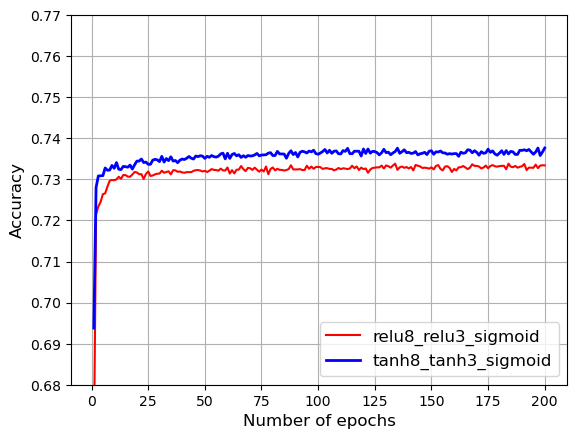

In [65]:
# # Plot the accuracy
plt.plot(x, history1_df['accuracy'], label=legend1, c='r')
plt.plot(x, history2_df['accuracy'], label=legend2, c='b', lw=2)
plt.legend(loc='lower right', fontsize=12)
plt.xlabel('Number of epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim([0.68, 0.77])
plt.grid()
# Save the figure.
plt.savefig(f'Data/AccuracyCurve_{legend2}_{epochn}.png', bbox_inches='tight', facecolor='w')
# Show Figure
plt.show()